# Load libraries

## Pad: `https://bit.ly/2pliIsw`


In [2]:
import pandas as pd
# imports library and gives aliase

In [3]:
import urllib.request
# only imports 1 function of this library

### download data

In [9]:
# source data
source_url = "ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Escherichia_coli/reference/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz"
# save data to
gff_file = "E_coli.gff.gz"
#both are strings

In [8]:
urllib.request.urlretrieve(source_url, gff_file)
#function retrieves source url and safe as gff_file

('E_coli.gff.gz', <email.message.Message at 0x1d026c5bdc8>)

In [14]:
gff_data = pd.read_csv(gff_file, sep="\t", comment="#",
                      names = ["seqid","source","type", 
                               "start", "end", "score",
                               "strand","phase", "attributes"])
# load csv, uses tabs to separate column ("\t"), ignore all lines with a # symbole (read as comment), names labels the coloums in this case as array. the gff file has no headerline as it is compressed

In [15]:
gff_data

,seqid,source,type,start,end,score,strand,phase,attributes
0,NC_000913.3,RefSeq,region,1,4641652,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...
...,...,...,...,...,...,...,...,...,...
10116,NC_000913.3,RefSeq,CDS,4639590,4640306,.,-,0,ID=cds-NP_418818.1;Parent=gene-b4401;Dbxref=Un...
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."
10118,NC_000913.3,RefSeq,CDS,4640402,4640542,.,+,0,ID=cds-NP_418819.1;Parent=gene-b4402;Dbxref=Un...
10119,NC_000913.3,RefSeq,gene,4640942,4641628,.,+,.,"ID=gene-b4403;Dbxref=ASAP:ABE-0014442,ECOCYC:E..."


In [17]:
gff_data.shape
#shows layout of file

(10121, 9)

In [19]:
gff_data["type"]
#shows row "type" as panda series

0        region
1          gene
2           CDS
3          gene
4           CDS
          ...  
10116       CDS
10117      gene
10118       CDS
10119      gene
10120       CDS
Name: type, Length: 10121, dtype: object

In [22]:
gff_data["type"].unique()
#shows unique values in this column

array(['region', 'gene', 'CDS', 'repeat_region', 'mobile_genetic_element',
       'ncRNA', 'exon', 'rRNA', 'tRNA', 'pseudogene', 'sequence_feature',
       'recombination_feature', 'origin_of_replication'], dtype=object)

In [25]:
gff_data["type"].value_counts()
#counts how often each types is present

gene                      4419
CDS                       4379
repeat_region              697
exon                       180
pseudogene                 166
tRNA                        86
ncRNA                       72
mobile_genetic_element      49
sequence_feature            48
rRNA                        22
origin_of_replication        1
recombination_feature        1
region                       1
Name: type, dtype: int64

In [27]:
gff_data["type"]=="gene" # this gives a coloum of true / false values for each row
#  == means no assignment like = but compares --> == means comparisson
# looks for rows with gene in type column

0        False
1         True
2        False
3         True
4        False
         ...  
10116    False
10117     True
10118    False
10119     True
10120    False
Name: type, Length: 10121, dtype: bool

In [31]:
gff_data[gff_data["type"] == "gene"]
# gives all the lines for which this is true

,seqid,source,type,start,end,score,strand,phase,attributes
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E..."
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
10115,NC_000913.3,RefSeq,gene,4639590,4640306,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E..."
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."


In [32]:
gene_data = gff_data[gff_data["type"] == "gene"]
# saves data instead of displaying

In [46]:
gff_data[(gff_data["type"] == "gene") & (gff_data["strand"] == "+")]
#filters for type is gene and strand is +

,seqid,source,type,start,end,score,strand,phase,attributes
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
10109,NC_000913.3,RefSeq,gene,4636007,4636696,.,+,.,"ID=gene-b4398;Dbxref=ASAP:ABE-0014428,ECOCYC:E..."
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E..."
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."


In [47]:
strand_plus_gene_data = gff_data[(gff_data["type"] == "gene") & (gff_data["strand"] == "+")]

In [50]:
%who
# % lets you talk to jupyter directly
# %who will give you alls variables

gene_data	 gff_Data	 gff_data	 gff_file	 pd	 source_url	 strand_plus_gene_data	 urllib	 


In [56]:
strand_plus_gene_data.to_csv("strand_plus_gene_data.csv")
#saves as csv file

In [57]:
strand_plus_gene_data.to_excel("strand_plus_gene_data.xls")
#saves as .xls

In [61]:
gene_data["length"] = gene_data["end"] - gene_data["start"]
# adds a new column named length as is does not already have a column named length

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
gene_data

,seqid,source,type,start,end,score,strand,phase,attributes,length
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E...",65
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E...",2462
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E...",932
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E...",1286
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G...",296
...,...,...,...,...,...,...,...,...,...,...
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E...",1424
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E...",1352
10115,NC_000913.3,RefSeq,gene,4639590,4640306,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E...",716
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G...",140


In [60]:
gff_data

,seqid,source,type,start,end,score,strand,phase,attributes
0,NC_000913.3,RefSeq,region,1,4641652,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...
...,...,...,...,...,...,...,...,...,...
10116,NC_000913.3,RefSeq,CDS,4639590,4640306,.,-,0,ID=cds-NP_418818.1;Parent=gene-b4401;Dbxref=Un...
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."
10118,NC_000913.3,RefSeq,CDS,4640402,4640542,.,+,0,ID=cds-NP_418819.1;Parent=gene-b4402;Dbxref=Un...
10119,NC_000913.3,RefSeq,gene,4640942,4641628,.,+,.,"ID=gene-b4403;Dbxref=ASAP:ABE-0014442,ECOCYC:E..."


In [62]:
gene_data["length"].mean()
#calculated mean

911.7795881421137

In [65]:
gene_data["length"].median()
#calculates median

806.0

In [68]:
gene_data["length"].std()
#standarddeviation

641.0915829130412

In [69]:
%matplotlib inline 
#inline is jupyter function to show plot in the notebook instead of a new file
#matplitlib is standard plotting library for python, already importet with pandas at it'S a dependency

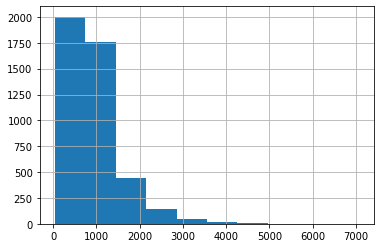

In [71]:
gene_data["length"].hist()
#creates histogram with default settings

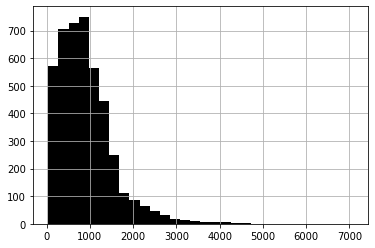

In [72]:
gene_data["length"].hist(bins=30, color="black")
#specific settings

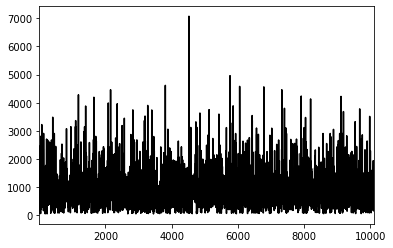

In [84]:
gene_data["length"].plot(color="black")
#specific settings

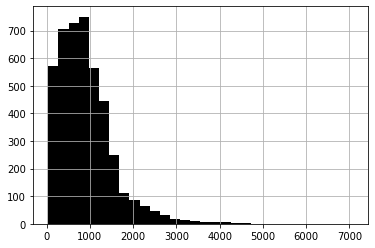

In [85]:
ax = gene_data["length"].hist(bins=30, color="black")
fig = ax.get_figure()
fig.savefig("plot.pdf")